

# Project Python Foundations: FoodHub Data Analysis

**Marks: 50**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
df = pd.read_csv('/content/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [1mark]

In [ ]:
# to get the number of rows & column in the data
df.shape

(1898, 9)

#### Observations:
 We have a total **1898 rows** and **9 columns** in the dataframe.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [1 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
##### We have **3** datatypes:
##### a. **int64**: order_id, customer_id, food_preparation_time & delivery_time
##### b. **object**: restaurant_name, cuisine_type, day_of_the_week & rating
##### b. **float64**: cost_of_the_order


### **Question 3:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Statistical summary of the data
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations:
##### The minimum, average, and maximum time it takes for food to be prepared once an order is placed are 20, 27.37 and 35 minutes respectively.


### **Question 4:** How many orders are not rated? [1 mark]

In [ ]:
# To find the ratings given to the orders
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [ ]:
# Percentage based on ratings of orders
round(df['rating'].value_counts(normalize=True),2)*100

Not given    39.0
5            31.0
4            20.0
3            10.0
Name: rating, dtype: float64

#### Observations:
##### A total of 736 orders are not rated which is 39% of the total orders.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 5:** Explore all the variables and provide observations on their distributions. (Generally, distinct number of values, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#### 1. Observation on Order IDs:


In [ ]:
# distinct no of order ids
df['order_id'].nunique()

1898

##### a. We have 1898 distinct order ids.

#### 2. Observation on Customer IDs:

In [ ]:
# distinct no of customer ids
df['customer_id'].nunique()

1200

##### a. We have total 1200 unique customers.

In [ ]:
# number of orders per customer
df.customer_id.value_counts()

52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: customer_id, Length: 1200, dtype: int64

##### b. Customer with order ID '52832' has ordered the maximum number of orders i.e. 13.

In [ ]:
# number of customers per order count
arr = df.customer_id.value_counts()
order_count = pd.DataFrame(arr)
order_count.value_counts()

customer_id
1              784
2              267
3               83
4               33
5               19
6                6
7                4
8                1
9                1
10               1
13               1
dtype: int64

In [ ]:
# Percentage of order count of customers
round((order_count.value_counts(normalize=True)),2)*100

customer_id
1              65.0
2              22.0
3               7.0
4               3.0
5               2.0
6               0.0
7               0.0
8               0.0
9               0.0
10              0.0
13              0.0
dtype: float64

##### c. 784 customers which is 65% of the total customers have ordered only 1 order.

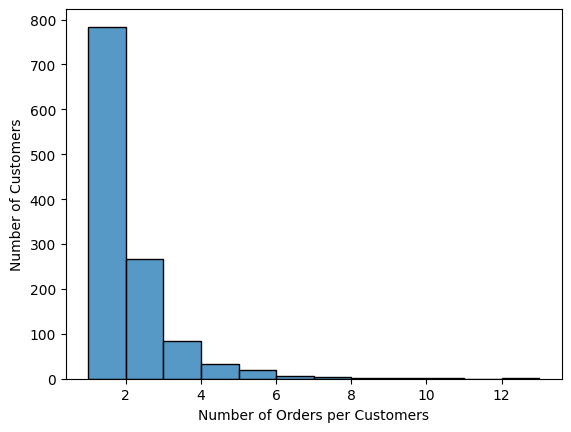

In [ ]:
# Plotting the order counts against the number of customers
sns.histplot(df.customer_id.value_counts(),binwidth = 1)
plt.xlabel('Number of Orders per Customers')
plt.ylabel('Number of Customers')
plt.show()

#### 3. Observation on Restaurant:

In [ ]:
#distinct no of restaurants
df['restaurant_name'].nunique()

178

##### a. Total 178 restaurants.

In [108]:
# number of orders per customer
df.restaurant_name.value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

In [110]:
arr = df.restaurant_name.value_counts()
rorder_count = pd.DataFrame(arr)
rorder_count.value_counts()

restaurant_name
1                  50
3                  23
2                  23
4                  13
5                  11
6                   6
7                   6
9                   4
18                  4
16                  3
12                  3
15                  3
37                  2
29                  2
27                  2
14                  2
13                  2
11                  2
46                  1
96                  1
68                  1
119                 1
59                  1
132                 1
55                  1
49                  1
23                  1
44                  1
42                  1
30                  1
25                  1
24                  1
10                  1
8                   1
219                 1
dtype: int64

In [111]:
round((rorder_count.value_counts(normalize=True)),2)*100

restaurant_name
1                  28.0
3                  13.0
2                  13.0
4                   7.0
5                   6.0
6                   3.0
7                   3.0
9                   2.0
18                  2.0
16                  2.0
12                  2.0
15                  2.0
37                  1.0
29                  1.0
27                  1.0
14                  1.0
13                  1.0
11                  1.0
46                  1.0
96                  1.0
68                  1.0
119                 1.0
59                  1.0
132                 1.0
55                  1.0
49                  1.0
23                  1.0
44                  1.0
42                  1.0
30                  1.0
25                  1.0
24                  1.0
10                  1.0
8                   1.0
219                 1.0
dtype: float64

28% restaurant have placed only 1 order

In [ ]:
# Percentage of order count of restaurants
round((df.restaurant_name.value_counts(normalize=True)),2)*100

Shake Shack                  12.0
The Meatball Shop             7.0
Blue Ribbon Sushi             6.0
Blue Ribbon Fried Chicken     5.0
Parm                          4.0
                             ... 
Sushi Choshi                  0.0
Dos Caminos Soho              0.0
La Follia                     0.0
Philippe Chow                 0.0
'wichcraft                    0.0
Name: restaurant_name, Length: 178, dtype: float64

##### b. Shake Shak has the most number of order, 219, about 12% of total orders.

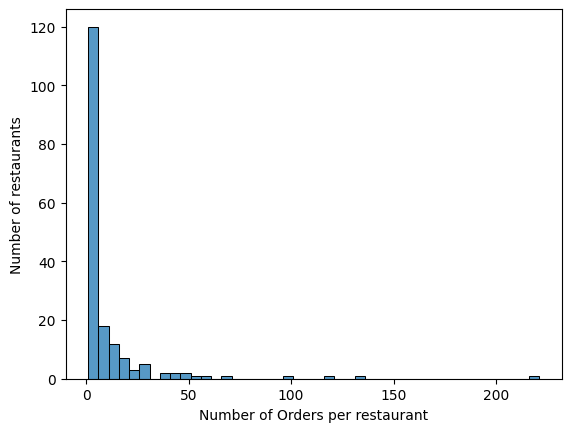

In [ ]:
# Plotting the order counts against the number of restaurants
sns.histplot(df.restaurant_name.value_counts(),binwidth=5)
plt.xlabel('Number of Orders per restaurant')
plt.ylabel('Number of restaurants')
plt.show()

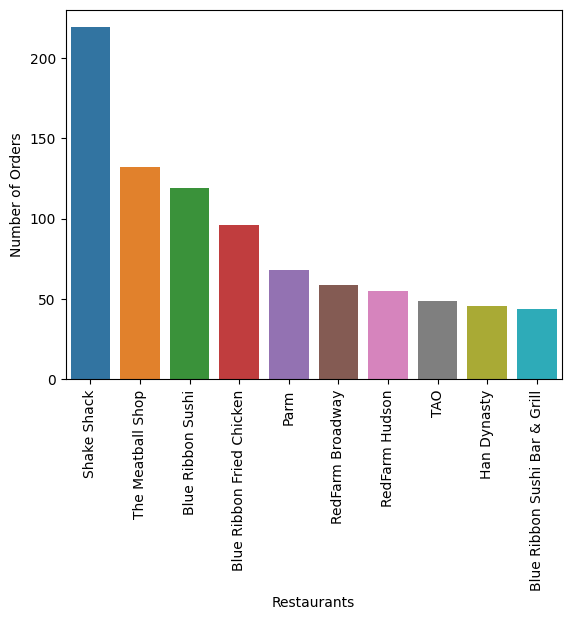

In [ ]:
# Order count per top 10 restaurant
sns.countplot(data=df,x='restaurant_name', order = df.restaurant_name.value_counts()[0:10].index)
plt.xlabel('Restaurants')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.show()

#### 4. Observation on Cuisine type

In [ ]:
# Types of Cuisines
df['cuisine_type'].unique()

array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

In [ ]:
# Total Number of Distict Cuisines
df['cuisine_type'].nunique()

14

In [ ]:
# Count of different cuisines
df.cuisine_type.value_counts()

American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64

In [ ]:
# Percentage of order count of restaurants
round((df.cuisine_type.value_counts(normalize=True)),2)*100

American          31.0
Japanese          25.0
Italian           16.0
Chinese           11.0
Mexican            4.0
Indian             4.0
Middle Eastern     3.0
Mediterranean      2.0
Thai               1.0
French             1.0
Southern           1.0
Korean             1.0
Spanish            1.0
Vietnamese         0.0
Name: cuisine_type, dtype: float64

#####a. Total 14 cuisines out of which American is the most popular.
b. Total 584 orders for American which is 31% of total orders followed by Japanese and Italian.

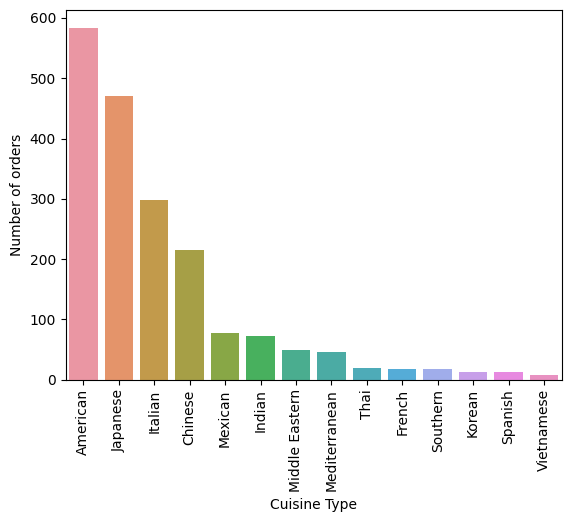

In [ ]:
# Order count per Cuisine
sns.countplot(data=df,x='cuisine_type', order = df.cuisine_type.value_counts().index)
plt.xlabel('Cuisine Type')
plt.ylabel('Number of orders')
plt.xticks(rotation=90)
plt.show()

#### 5. Observation on Cost

In [ ]:
# Count of costs
df.cost_of_the_order.value_counts()

12.18    86
12.13    82
12.23    47
24.20    42
29.10    37
         ..
5.48      1
17.07     1
6.26      1
9.61      1
29.59     1
Name: cost_of_the_order, Length: 312, dtype: int64

In [ ]:
# maximum and minimum costs
round(df.cost_of_the_order.describe(),2)

count    1898.00
mean       16.50
std         7.48
min         4.47
25%        12.08
50%        14.14
75%        22.30
max        35.41
Name: cost_of_the_order, dtype: float64

a. Average, minimum and maximum of cost of the orders are 16.50, 4.47 and 35.41 dollars respectively.

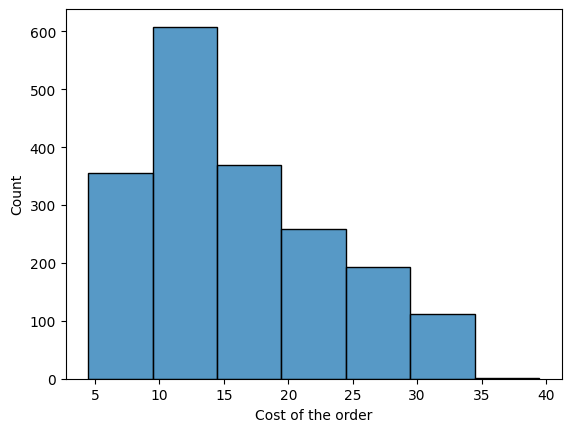

In [ ]:
# Plotting cost of orders vs order count
sns.histplot(df.cost_of_the_order, binwidth=5)
plt.xlabel('Cost of the order')
plt.show()

b. Maximum orders are ranging from 10 - 15 dollars

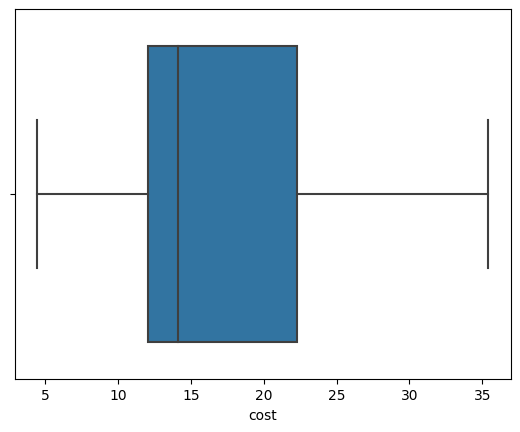

In [ ]:
sns.boxplot(x = df.cost_of_the_order)
plt.xlabel('cost')
plt.show()

#### 6. Observation on Day of the Week

In [ ]:
# Count of different cuisines
df.day_of_the_week.value_counts()

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

In [ ]:
# Percentage of order count of restaurants
round((df.day_of_the_week.value_counts(normalize=True)),2)*100

Weekend    71.0
Weekday    29.0
Name: day_of_the_week, dtype: float64

a. Most of the orders (71%) are on Weekends.

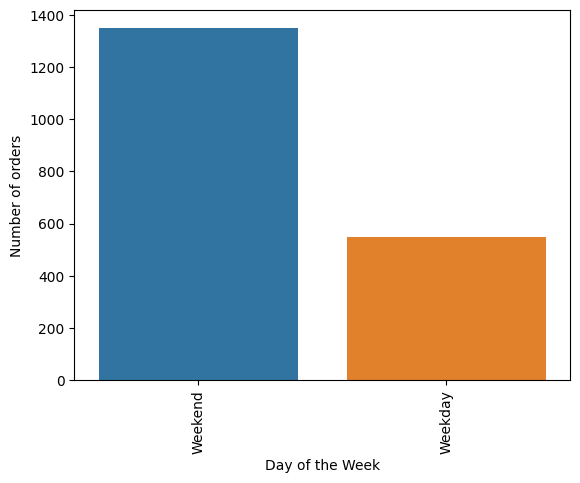

In [ ]:
# orders on weekends & weekdays
sns.countplot(data=df,x='day_of_the_week', order = df.day_of_the_week.value_counts().index)
plt.xlabel('Day of the Week')
plt.ylabel('Number of orders')
plt.xticks(rotation=90)
plt.show()

#### 7. Observation on Rating

In [ ]:
# find types & no of ratings
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [ ]:
# Percentage of ratings
round((df['rating'].value_counts(normalize=True)),2)*100

Not given    39.0
5            31.0
4            20.0
3            10.0
Name: rating, dtype: float64

a. 39% of total orders are not rated

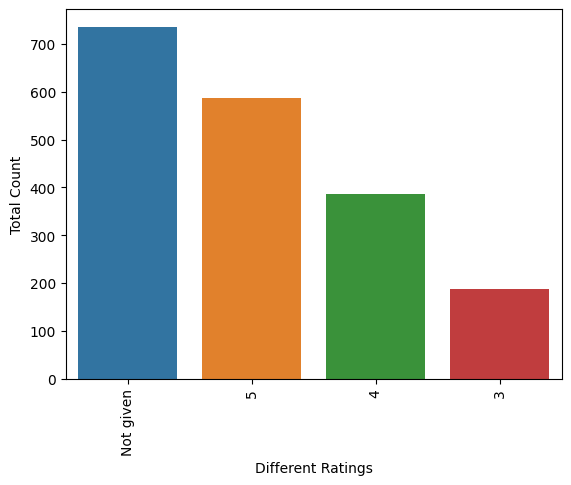

In [ ]:
# order count for different ratings
sns.countplot(data=df,x='rating', order = df.rating.value_counts().index)
plt.xlabel('Different Ratings')
plt.ylabel('Total Count')
plt.xticks(rotation=90)
plt.show()

#### 8. Observation on food preparation time

In [ ]:
df['food_preparation_time'].value_counts()

21    135
23    123
27    123
22    123
28    121
24    121
20    119
30    119
33    118
35    117
31    116
26    115
25    113
34    113
32    113
29    109
Name: food_preparation_time, dtype: int64

In [ ]:
round(df.food_preparation_time.describe(),2)

count    1898.00
mean       27.37
std         4.63
min        20.00
25%        23.00
50%        27.00
75%        31.00
max        35.00
Name: food_preparation_time, dtype: float64

a. The mean, minimum and maximum preparation time are 27.37, 20 and 35 minutes respectively.

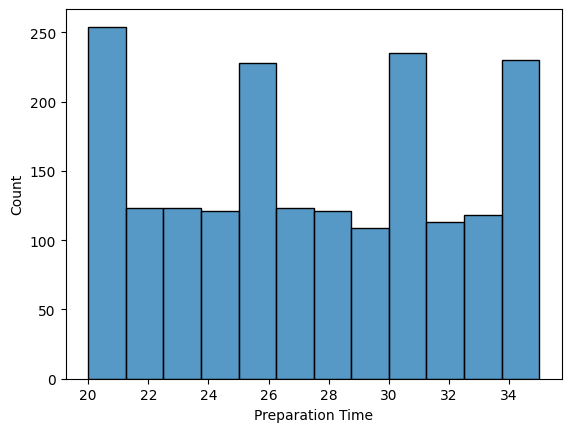

In [ ]:
sns.histplot(df.food_preparation_time)
plt.xlabel('Preparation Time')
plt.show()

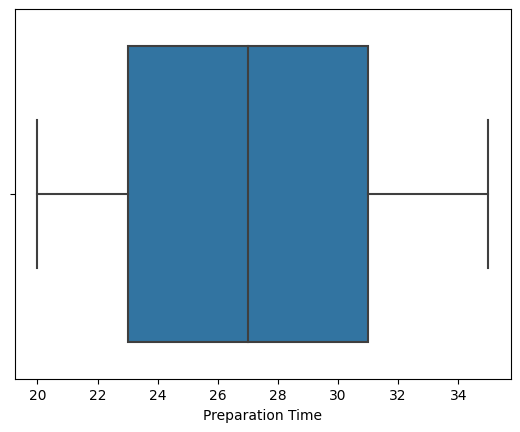

In [ ]:
sns.boxplot(x = df.food_preparation_time)
plt.xlabel('Preparation Time')
plt.show()

#### 9. Observation on delivery time

In [ ]:
df['delivery_time'].value_counts()

24    162
28    148
29    148
26    141
27    138
30    133
25    120
19     90
16     90
20     88
15     87
22     85
18     83
21     81
17     78
23     77
32     59
33     49
31     41
Name: delivery_time, dtype: int64

In [ ]:
round(df.delivery_time.describe(),2)

count    1898.00
mean       24.16
std         4.97
min        15.00
25%        20.00
50%        25.00
75%        28.00
max        33.00
Name: delivery_time, dtype: float64

a. The mean, minimum and maximum delivery time are 24.16, 15 and 33 minutes respectively.

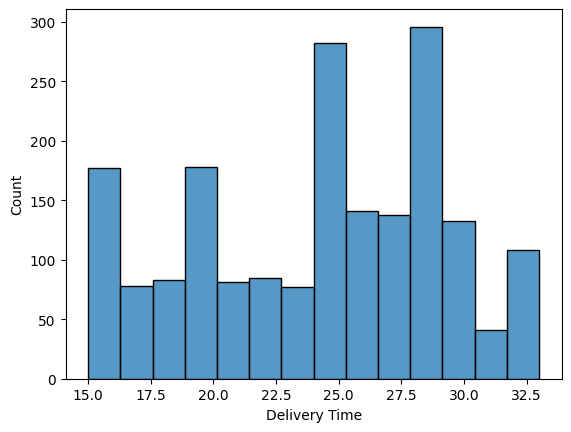

In [ ]:
sns.histplot(df.delivery_time)
plt.xlabel('Delivery Time')
plt.show()

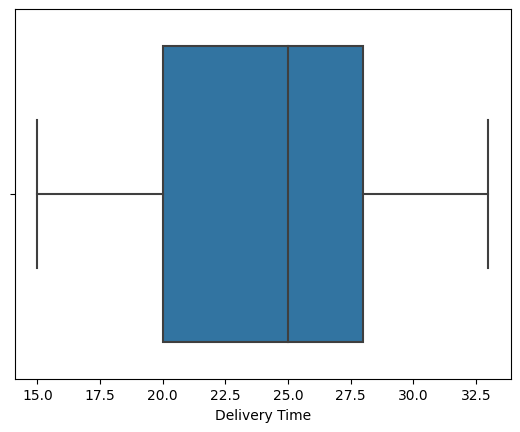

In [ ]:
sns.boxplot(x = df.delivery_time)
plt.xlabel('Delivery Time')
plt.show()

### **Question 6**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
df.restaurant_name.value_counts()[0:5]

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

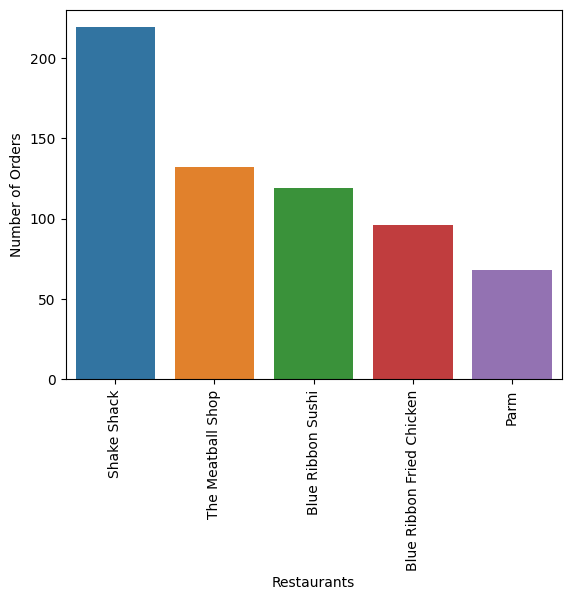

In [ ]:
# Order count per top 10 restaurant
sns.countplot(data=df,x='restaurant_name', order = df.restaurant_name.value_counts()[0:5].index)
plt.xlabel('Restaurants')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.show()

#### Observations:
Top 5 are: Shake Shack                  (219),
The Meatball Shop            (132),
Blue Ribbon Sushi            (119)
Blue Ribbon Fried Chicken     (96)'
Parm(68)     


### **Question 7**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
df.cuisine_type.value_counts()

American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64

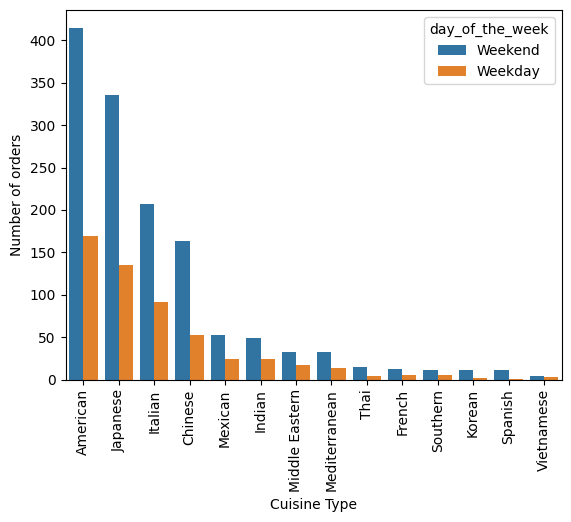

In [ ]:
# Order count per Cuisine
sns.countplot(data=df,x='cuisine_type', order = df.cuisine_type.value_counts().index, hue='day_of_the_week')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of orders')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts().head(5)

American    415
Japanese    335
Italian     207
Chinese     163
Mexican      53
Name: cuisine_type, dtype: int64

#### Observations:
American is the most popular cuisine on weekends.


### **Question 8**: What percentage of the orders cost more than 20 dollars?(use .round function to round the final percentage) [2 marks]

In [ ]:
round(len(df[df['cost_of_the_order']>20])/len(df),3)*100

29.2

#### Observations: 29.2% of orders cost more than 20 USD.


### **Question 9**: What is the mean order delivery time? [1 mark]

In [ ]:
round(df['delivery_time'].mean(),2)

24.16

#### Observations: mean delivery time = 24.16 minutes


### **Question 10:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
df.customer_id.value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations: customers with IDs 52832, 47440 and 83287 will get 20% discount who have placed 13, 10 and 9 orders respectively.



### Multivariate Analysis

### **Question 11**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [8 marks]


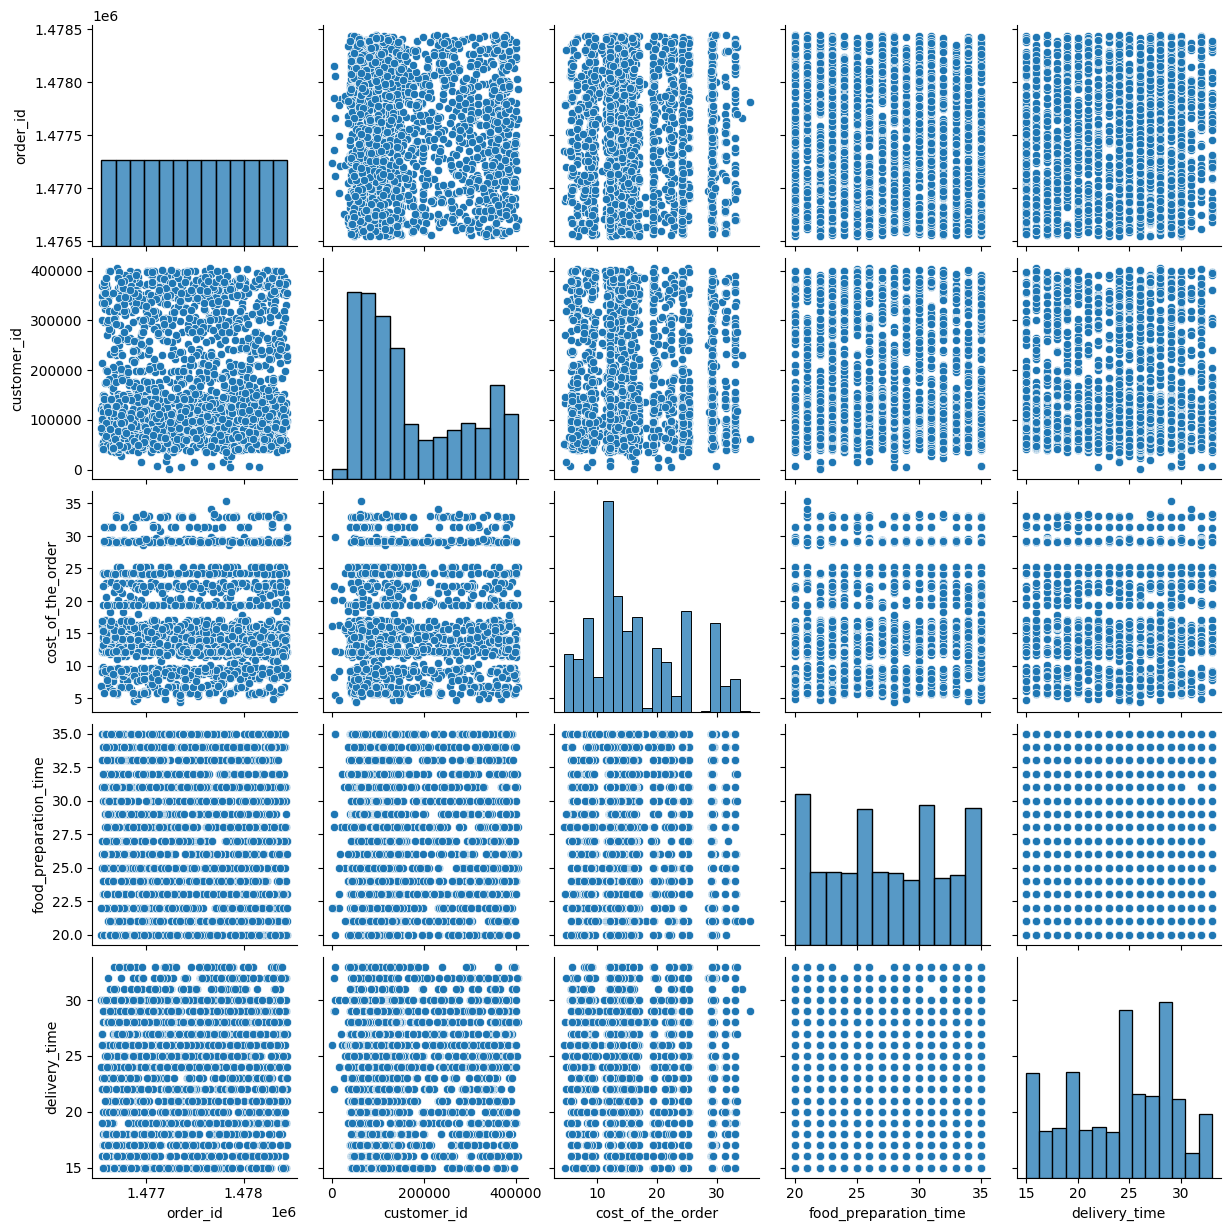

In [ ]:
# pairplot of the dataset
sns.pairplot(data=df)
plt.show()

<ipython-input-57-f6412ee67fb3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


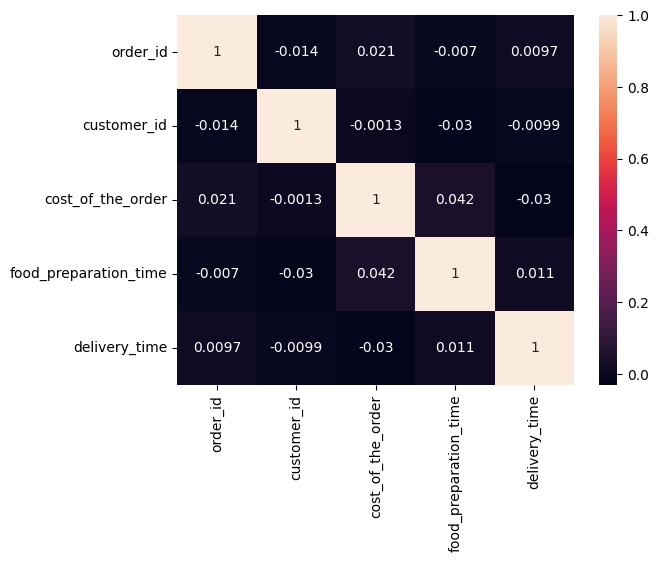

In [ ]:
# heatmap
sns.heatmap(df.corr(),annot=True)
plt.show()

Variables have very weak correlation.

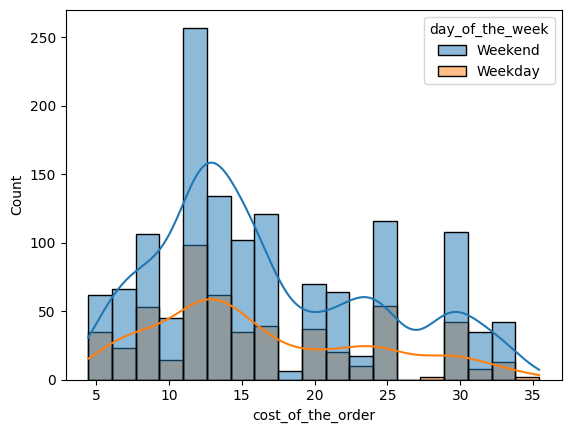

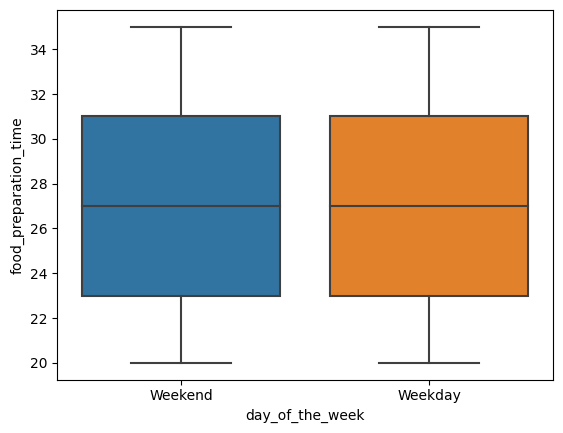

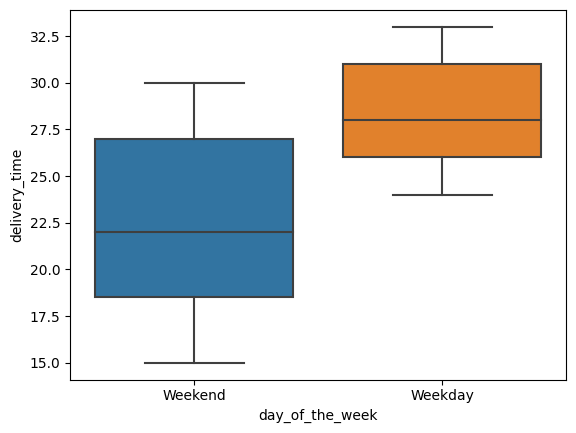

In [ ]:
# day of the week vs others
sns.histplot(data = df, x = 'cost_of_the_order', hue = 'day_of_the_week', kde = True)
plt.show()
sns.boxplot(data=df,x='day_of_the_week',y='food_preparation_time')
plt.show()
sns.boxplot(data=df,x='day_of_the_week',y='delivery_time')
plt.show()

Observations:
* Higher order values on weekends
* Food preparation time distribution similar on both weekends and weekdays
* Delivery time is faster on weekends


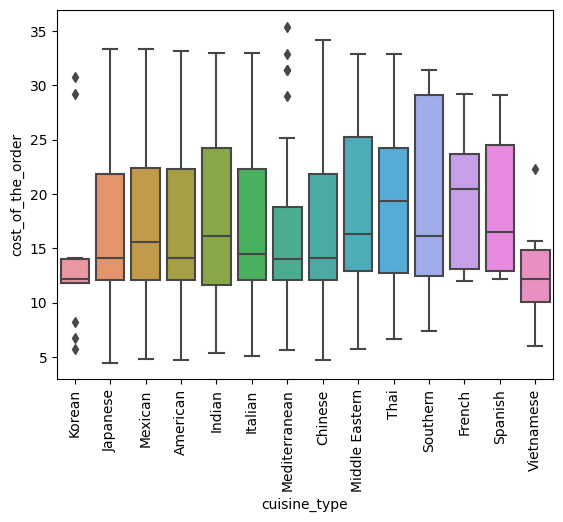

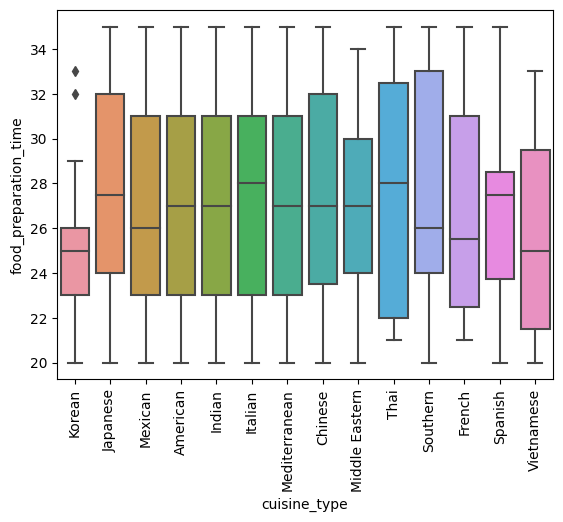

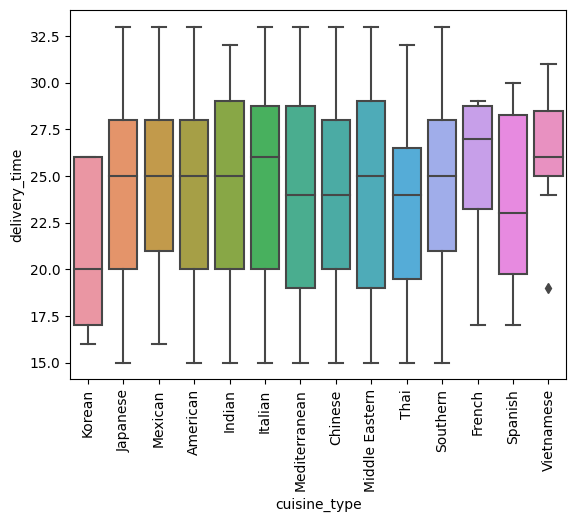

In [ ]:
# cuisine type vs others
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order')
plt.xticks(rotation=90);
plt.show();
sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time')
plt.xticks(rotation=90);
plt.show();

sns.boxplot(data=df, x='cuisine_type', y='delivery_time')
plt.xticks(rotation=90);
plt.show();

Observations:
* 1. Korean is the cheapest cuisine
* 2. Korean is the fastest cuisine to make
* 3. Other cuisines take similar time to make

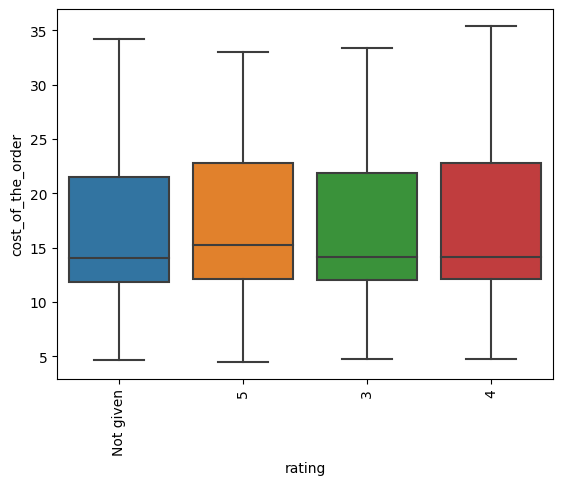

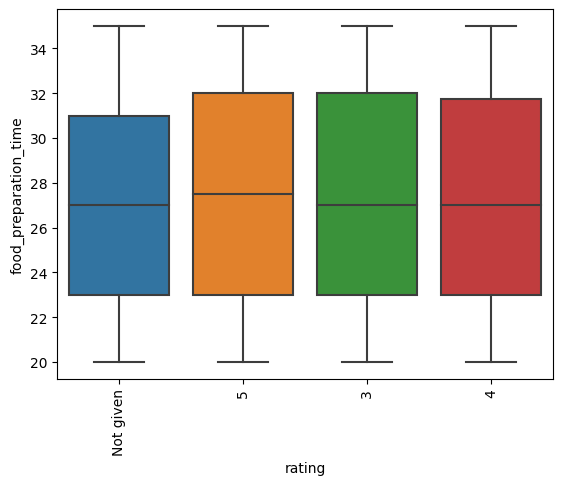

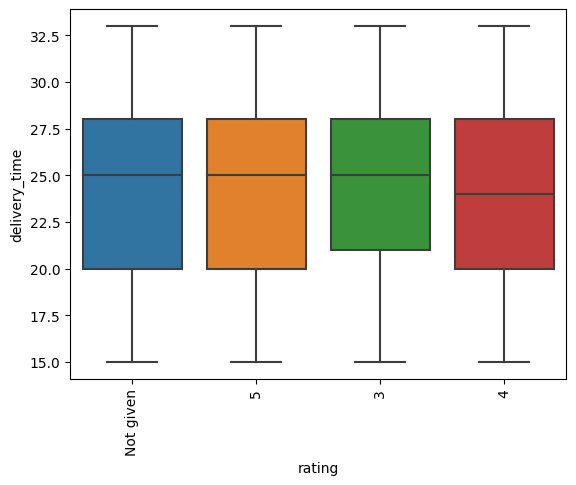

In [ ]:
# ratings vs others
sns.boxplot(data=df, x='rating', y='cost_of_the_order')
plt.xticks(rotation=90);
plt.show();
sns.boxplot(data=df, x='rating', y='food_preparation_time')
plt.xticks(rotation=90);
plt.show();

sns.boxplot(data=df, x='rating', y='delivery_time')
plt.xticks(rotation=90);
plt.show();

1. Similar distribution suggests not much significant impact of cost, delivery or preparation time on ratings

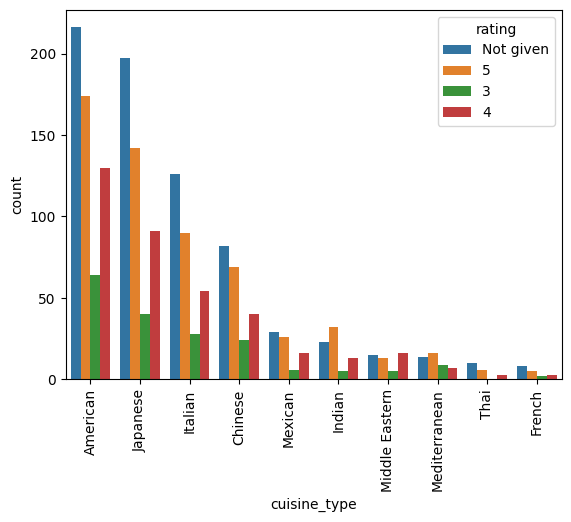

In [ ]:
sns.countplot(data = df, x = 'cuisine_type', hue = 'rating', order = df.cuisine_type.value_counts()[0:10].index)
plt.xticks(rotation=90);

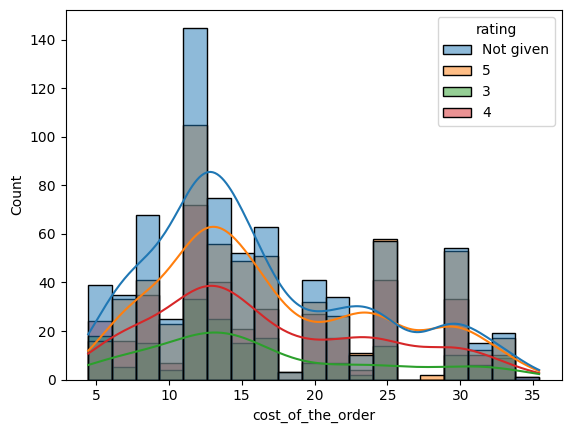

In [ ]:
sns.histplot(data = df, x = 'cost_of_the_order', hue = 'rating', kde = True)
plt.show()

2. 10-15 dollars orders have the most ratings

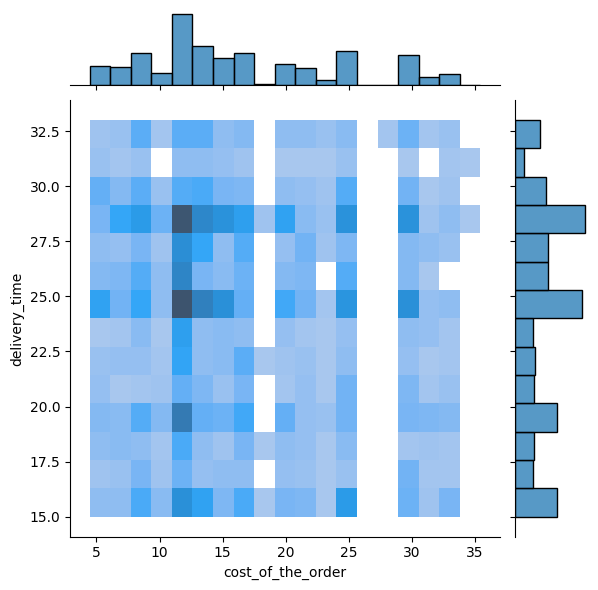

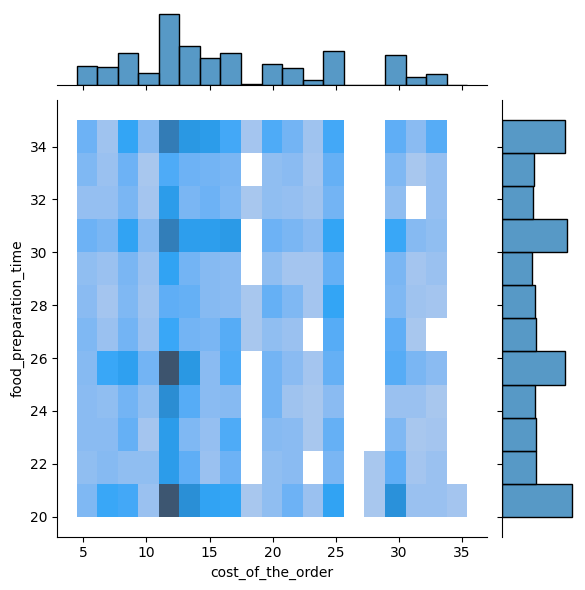

In [ ]:
sns.jointplot(data = df, x = 'cost_of_the_order', y = 'delivery_time', kind= 'hist')
plt.show()
sns.jointplot(data = df, x = 'cost_of_the_order', y = 'food_preparation_time', kind= 'hist')
plt.show()

Most of the orders are in between 10-15 dollars

### **Question 12:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
df_rating = df[['restaurant_name','rating']][df['rating']!= 'Not given'].groupby('restaurant_name').mean()> 4
df_rating.reset_index(inplace=True)
df_count = df[['rating','restaurant_name']][df['rating']!= 'Not given'].groupby('restaurant_name').count()> 50
df_count.reset_index(inplace=True)
promo_restaurant = pd.merge(df_count[df_count['rating']== True], df_rating[df_rating['rating']== True],on ='restaurant_name')
promo_restaurant.restaurant_name

0    Blue Ribbon Fried Chicken
1            Blue Ribbon Sushi
2                  Shake Shack
3            The Meatball Shop
Name: restaurant_name, dtype: object

### **Question 13:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [2 marks]

In [ ]:
# Loop through the series calculating the individual income component and adding it to the revenue variable
revenue = 0
for i in df['cost_of_the_order']:
    if (i > 20):
        revenue = revenue + (i*0.25)
    elif (5 < i < 20):
        revenue = revenue + (i*0.15)
    else:
        revenue = revenue + (i*0)
print('The net revenue on all orders is:', "{:.2f}".format(revenue))

The net revenue on all orders is: 6166.30


### **Question 14:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) (Use .round function to round value to nearest zero) [2 marks]

In [ ]:
df['total_prep_time'] = df['food_preparation_time']+df['delivery_time']
round(len(df[df.total_prep_time>60])/len(df)*100,1)

10.5

#### Observations:
10.5% of orders take more than 60 minutes to get delivered from the time the order is placed.


### **Question 15:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here
df.groupby('day_of_the_week')['delivery_time']

In [ ]:
round(df.groupby('day_of_the_week')['delivery_time'].mean(),2)

day_of_the_week
Weekday    28.34
Weekend    22.47
Name: delivery_time, dtype: float64

Mean Delivery time on weekends = 22.47 minutes where on weekdays is 28.34 minutes

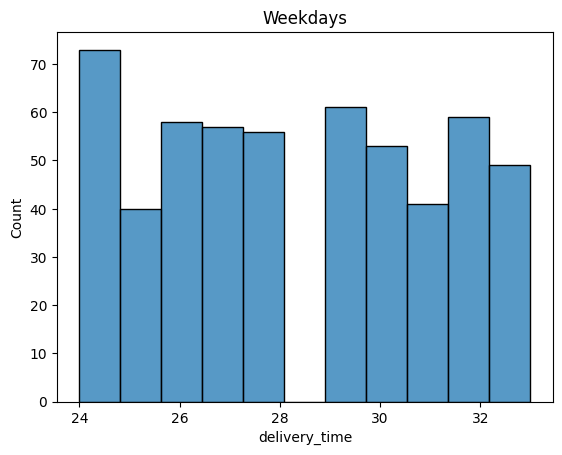

In [ ]:
sns.histplot(data=df[df.day_of_the_week=='Weekday'], x='delivery_time')
plt.title('Weekdays');

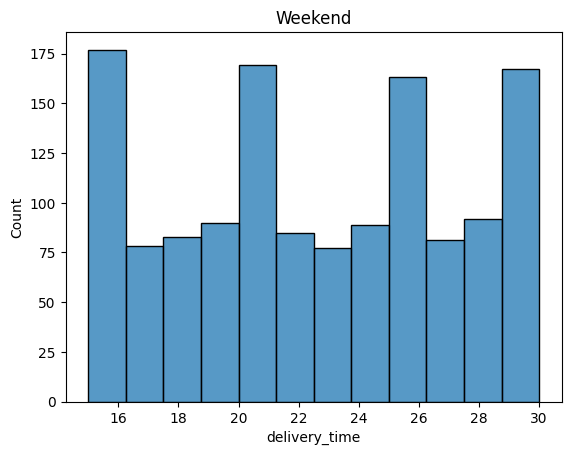

In [ ]:
sns.histplot(data=df[df.day_of_the_week=='Weekend'], x='delivery_time')
plt.title('Weekend');

### Conclusion and Recommendations

### **Question 16:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [4 marks]

### Conclusions:


1.   65% customers have only placed ONE single order. Followed by the second highest population approximately 22% which has only placed TWO orders.
2. Only 3 restaurants have crossed 100 orders.  
3. Number of orders are higher for American cuisines and on weekends.
4. Orders valued between 11-15 dollars have highest order counts
5. Preparation time is similar but delivery time is faster on weekends than weekdays
6. 71% orders not rated, factors like cost or time have been seen to have no effects on ratings




### Recommendations:

1. Encourage customers to make more orders frequently/higher order value purchase through coupons, discounts etc
2. Encourage restaurants to make meals under 15 dollars since it has highest order counts
3. Encourage customers to give more ratings to understand the products better and to find out what impacts those ratings
4. Encourage restaurants to increase the american, Japanese and Italian cuisine choices
5. Decrease delivery time on weekdays to increase orders on weekdays.
